# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
idade_media = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
idade_media.head()

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


In [5]:
idade_media.groupby('munResNome').median()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.0,28.5
Alto Alegre dos Parecis,25.0,28.0
Alto Paraíso,24.0,25.5
Alvorada D'Oeste,25.0,31.0
Ariquemes,25.0,29.0
Buritis,25.0,28.5
Cabixi,26.0,35.5
Cacaulândia,25.0,33.5
Cacoal,26.0,30.0


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [6]:
peso_escolaridade_dtnasc = sinasc_raw[['DTNASC', 'SEXO','ESCMAE', 'PESO']]
peso_escolaridade_dtnasc.head()

,DTNASC,SEXO,ESCMAE,PESO
0,2019-02-19,Masculino,8 a 11 anos,3685
1,2019-02-21,Feminino,8 a 11 anos,3055
2,2019-02-25,Feminino,8 a 11 anos,3460
3,2019-03-20,Feminino,12 anos ou mais,2982
4,2019-03-23,Feminino,8 a 11 anos,3310


In [7]:
dtNasc_20_06 = peso_escolaridade_dtnasc[peso_escolaridade_dtnasc['DTNASC'] == '2019-06-20']
dtNasc_20_06

,DTNASC,SEXO,ESCMAE,PESO
1251,2019-06-20,Masculino,12 anos ou mais,4005
1354,2019-06-20,Feminino,4 a 7 anos,2716
2260,2019-06-20,Masculino,8 a 11 anos,3580
2261,2019-06-20,Feminino,12 anos ou mais,3070
2262,2019-06-20,Masculino,8 a 11 anos,3715
...,...,...,...,...
13188,2019-06-20,Feminino,8 a 11 anos,4290
13208,2019-06-20,Masculino,12 anos ou mais,2465
13210,2019-06-20,Masculino,4 a 7 anos,3645
13568,2019-06-20,Feminino,8 a 11 anos,3925


In [8]:
peso_medio = dtNasc_20_06.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().reset_index()
peso_medio

,SEXO,ESCMAE,PESO
0,Feminino,1 a 3 anos,3290.000000
1,Feminino,12 anos ou mais,3297.000000
2,Feminino,4 a 7 anos,3081.200000
3,Feminino,8 a 11 anos,3176.136364
4,Masculino,1 a 3 anos,2975.000000
5,Masculino,12 anos ou mais,3180.333333
6,Masculino,4 a 7 anos,3380.833333
7,Masculino,8 a 11 anos,3465.476190


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [9]:
contagem_mun = sinasc_raw['munResNome'].value_counts()
contagem_mun.tail()

munResNome
Parecis                    44
Primavera de Rondônia      43
Pimenteiras do Oeste       40
Castanheiras               32
Município ignorado - RO     1
Name: count, dtype: int64

In [10]:
#retirei o Município ignorado - RO, pois nao acredito ser um dado valido para este exercicio.
segundo_menor_municipio = contagem_mun[contagem_mun > contagem_mun.min()].idxmin()

segundo_menor_municipio

'Castanheiras'

In [11]:
df_segundo_menor = sinasc_raw[sinasc_raw['munResNome'] == segundo_menor_municipio]
df_segundo_menor.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
2067,1,2496046.0,110004,1,18,1.0,8 a 11 anos,999992.0,0.0,0.0,...,3,2087,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
2300,1,7648693.0,110004,1,31,5.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2323,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
4512,1,2495279.0,110012,1,22,1.0,8 a 11 anos,521135.0,0.0,0.0,...,2,4538,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
5881,1,2516047.0,110018,1,26,2.0,8 a 11 anos,NaN,0.0,0.0,...,5,5913,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
5952,1,2516047.0,110018,1,32,1.0,12 anos ou mais,NaN,2.0,0.0,...,5,5984,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842


In [12]:
df_medias = df_segundo_menor[['munResNome', 'IDADEMAE', 'IDADEPAI']]
df_medias.head()

,munResNome,IDADEMAE,IDADEPAI
2067,Castanheiras,18,17.0
2300,Castanheiras,31,36.0
4512,Castanheiras,22,NaN
5881,Castanheiras,26,24.0
5952,Castanheiras,32,29.0


In [13]:
df_medias[['IDADEPAI', 'IDADEMAE']].agg(['min', 'mean', 'max'])

,IDADEPAI,IDADEMAE
min,17.000000,17.00000
mean,30.392857,27.28125
max,43.000000,39.00000


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [14]:
maior_municipio = contagem_mun.idxmax()
maior_municipio

'Porto Velho'

In [15]:
df_maior_municipio = sinasc_raw[sinasc_raw['munResNome'] == maior_municipio]
df_maior_municipio.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
123,1,2515520.0,110002,1,22,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,125,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394
201,1,2494299.0,110002,1,22,2.0,8 a 11 anos,999992.0,0.0,0.0,...,5,204,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394
246,1,2494299.0,110002,1,29,1.0,8 a 11 anos,999992.0,2.0,0.0,...,3,249,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394
272,1,2494299.0,110002,1,27,2.0,4 a 7 anos,999992.0,2.0,1.0,...,5,275,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394
355,1,2515504.0,110002,1,33,2.0,8 a 11 anos,999992.0,0.0,0.0,...,5,359,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394


In [16]:
df_maior_data = df_maior_municipio[['munResNome', 'IDADEMAE', 'IDADEPAI','QTDFILVIVO']]  
df_maior_data.head()

,munResNome,IDADEMAE,IDADEPAI,QTDFILVIVO
123,Porto Velho,22,NaN,0.0
201,Porto Velho,22,NaN,0.0
246,Porto Velho,29,NaN,2.0
272,Porto Velho,27,NaN,2.0
355,Porto Velho,33,NaN,0.0


In [17]:
df_maior_data[['IDADEMAE', 'IDADEPAI','QTDFILVIVO']].agg(['min', 'mean', 'max'])

,IDADEMAE,IDADEPAI,QTDFILVIVO
min,12.00000,16.000000,0.000000
mean,26.31267,32.352679,1.167236
max,47.00000,65.000000,12.000000


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [18]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [19]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [20]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [21]:
sinasc_raw[['IDADEMAE', 'IDADEPAI']].agg(['min', 'mean', 'max'])

,IDADEMAE,IDADEPAI
min,11.000000,15.000000
mean,26.093718,31.092415
max,53.000000,86.000000


Descobri que a idade media em que homens tem filhos e maior que 30 anos, e mulheres menos que 27.

Que a mulher mais jovem tinha 11 anos e o homem mais velho 86 anos

Eu gostaria de testar a comparacao de idade da mae com a ausencia de informacies do pai, mas nao sei exatamente como extrarir este dado, e nem se ele tem relevancia, uma vez que saber os dados do pai nao quer diser q ele e presente. mas suspreito que exista uma relacao entre idade e ausencia paterna.

In [22]:
sinasc_raw['pai_ausente'] = sinasc_raw['IDADEPAI'].isna()

agrupamento_idade_mae = sinasc_raw.groupby('IDADEMAE')['pai_ausente'].mean().reset_index()
agrupamento_idade_mae.head()


,IDADEMAE,pai_ausente
0,11,1.000000
1,12,0.857143
2,13,0.888889
3,14,0.865031
4,15,0.799435


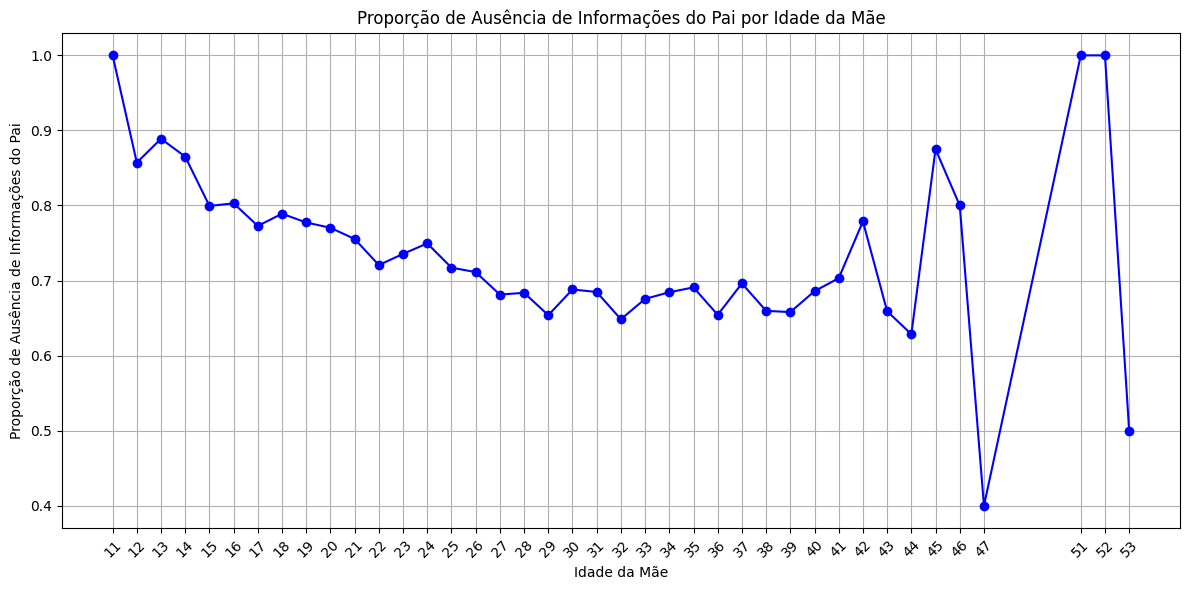

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(agrupamento_idade_mae['IDADEMAE'], agrupamento_idade_mae['pai_ausente'], marker='o', linestyle='-', color='b')
plt.xlabel('Idade da Mãe')
plt.ylabel('Proporção de Ausência de Informações do Pai')
plt.title('Proporção de Ausência de Informações do Pai por Idade da Mãe')
plt.grid(True)
plt.xticks(agrupamento_idade_mae['IDADEMAE'], rotation=45)  # Gira os rótulos do eixo x, se necessário
plt.tight_layout()

plt.show()


Aparentemente existe uma relacao, mas ela nao e tao evidente quanto eu imaginava

descobri em outro dos exercicios que o apgar5 tem realcao direta com a quantidade de semanas de gestacao. e que inclusive passar de 41 semanas e extremamente prejudicial.
eu poderia fazer essa comparacao aqui, mas preguica ne...